# CLEANING AND PREPROCESSING THE DATA
The provided data is in CSV format, containing columns such as `Category`, `Latitude`, `Longitude`, `Location Name`, and `Date`. The first step in training a model to provide crime statistics and identify areas prone to crime is to clean and preprocess the data. This would involve removing any unnecessary columns, converting categorical variables (such as type of crime) into numerical ones, and dealing with missing or invalid data.

To achieve this, we can use Python and pandas library to read in the CSV file, drop the `Location Name` column since it is unnecessary, encode the `Category` column using `LabelEncoder` from the `sklearn.preprocessing` library, and split the data into training and testing sets using train_test_split from the sklearn.model_selection library. The training data should contain 80% of the data, and the testing data should contain 20%. Finally, we set a random state for reproducibility purposes.

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Read in the data
df = pd.read_csv('fake_crime_reports.csv')

# Drop rows with NaN values
df.dropna(inplace=True)

# Drop unnecessary columns
df.drop(['Location Name'], axis=1, inplace=True)

# VISUALIZING CRIME DATA
After cleaning and preprocessing the crime data, the next step is to explore the data using visualizations and descriptive statistics. This will help us gain insights into patterns and trends in the data. We will create different types of plots to achieve this.

Firstly, we will plot the frequency of different types of crimes using a bar chart. This will help us understand which types of crimes are most common in the data.

Secondly, we will identify areas with high crime rates using a scatter plot. This will help us visualize the location of the crimes and identify areas where crimes are more prevalent.

Lastly, we will examine relationships between different variables such as crime type and location using a pair plot. This will help us understand any correlations or patterns between different variables in the data.

To achieve this, we will be using two Python libraries, matplotlib and seaborn. These libraries provide tools for creating different types of plots that help us visualize the data and gain insights from it.

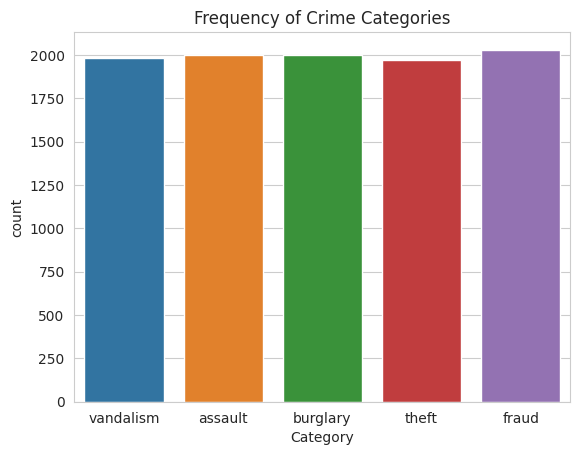

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of crime categories
sns.countplot(x='Category', data=df)
plt.title('Frequency of Crime Categories')
plt.show()

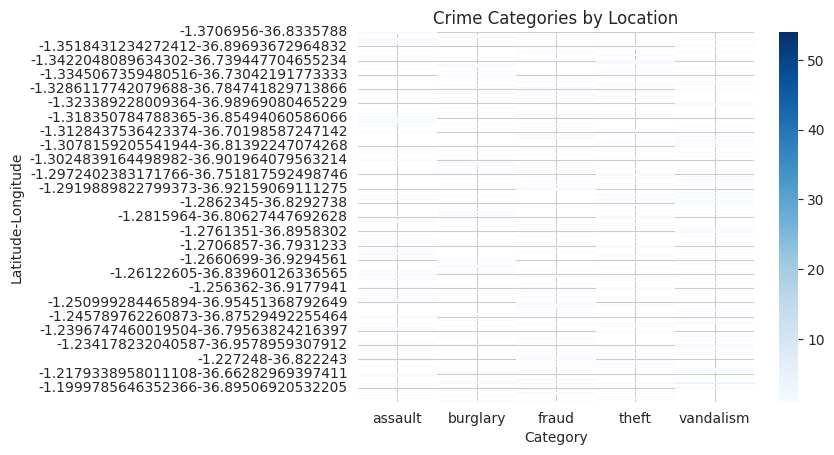

In [98]:
# Heatmap of crime categories by location
crime_location = df.groupby(['Latitude', 'Longitude'])['Category'].value_counts().unstack()
sns.heatmap(crime_location, cmap='Blues')
plt.title('Crime Categories by Location')
plt.show()

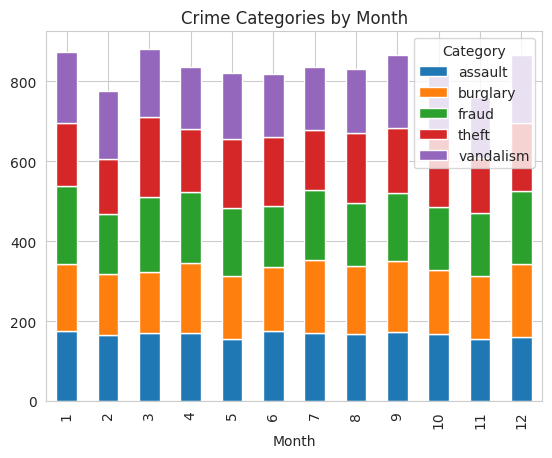

In [99]:

# Barplot of crime categories by month
df['Month'] = pd.DatetimeIndex(df['Date']).month
df_month = df.groupby(['Month', 'Category']).size().unstack()
df_month.plot(kind='bar', stacked=True)
plt.title('Crime Categories by Month')
plt.show()

In [100]:
# Descriptive statistics of crime data
print(df.describe())

          Latitude    Longitude        Month
count  9983.000000  9983.000000  9983.000000
mean     -1.284512    36.831681     6.477612
std       0.043944     0.084449     3.457339
min      -1.370696    36.654965     1.000000
25%      -1.319110    36.764312     3.000000
50%      -1.288627    36.828785     6.000000
75%      -1.251433    36.900100     9.000000
max      -1.165025    36.996939    12.000000


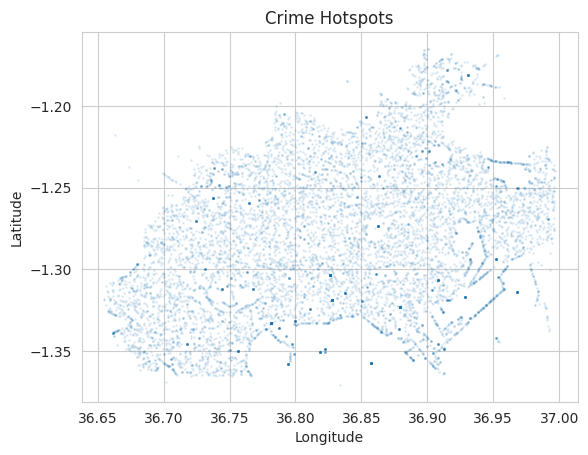

In [101]:
# Identify areas with high crime rates
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.1, s=1)
plt.title('Crime Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


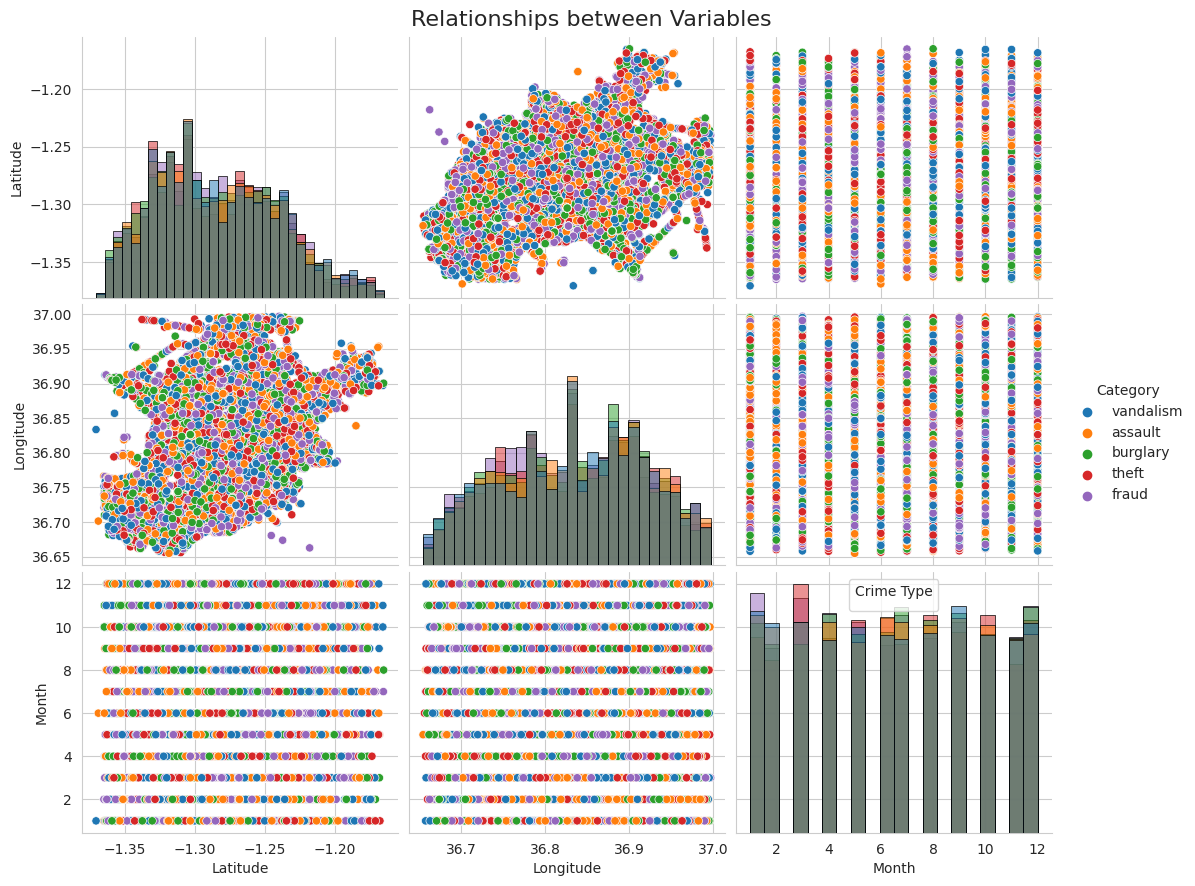

In [102]:
# Plot relationships between variables
sns.set_style("whitegrid")
sns.pairplot(df, hue='Category', height=3, aspect=1.2, diag_kind="hist", diag_kws=dict(edgecolor="k", linewidth=0.5))
plt.subplots_adjust(top=0.95)
plt.suptitle('Relationships between Variables', fontsize=16)
plt.legend(title='Crime Type')
plt.show()


In [103]:
# # Convert the Date column to datetime format
# df['Date'] = pd.to_datetime(df['Date'])

# # Extract features from the Date column
# df['Year'] = df['Date'].dt.year
# df['Month'] = df['Date'].dt.month
# df['Day'] = df['Date'].dt.day
# df['DayOfWeek'] = df['Date'].dt.dayofweek

# # Drop the original Date column
# df = df.drop(['Date'], axis=1)

# # Convert the Category column to numeric labels
# category_dict = {'theft': 0, 'vandalism': 1, 'burglary': 2, 'assault': 3}
# df['Category'] = df['Category'].map(category_dict)
# print(df.head())


# TRAINING THE MODEL
The next step is to train the model. We will be using the random forest calssifier to predict the likelihood of a crime occuring in a given area. The model will also help us mark areas prone to crime on a map. To train the model, we will use the training data we created earlier. We will then use the testing data to evaluate the model and determine its accuracy. The model will be trained using the `RandomForestClassifier` class from the `sklearn.ensemble` library. We will also use the `accuracy_score` function from the `sklearn.metrics` library to evaluate the model.

In [104]:
# from sklearn.linear_model import LogisticRegression
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score

# # Split the data into training and testing sets
# X = df.drop(['Category'], axis=1).values
# y = df['Category'].values

# # Remove rows with NaN values
# mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
# X = X[mask]
# y = y[mask]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Logistic Regression model
# lr = LogisticRegression(max_iter=1000)
# lr.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = lr.predict(X_test)

# # Evaluate the model

# # Accuracy
# print('Accuracy: ', accuracy_score(y_test, y_pred))

# # Precision
# print('Precision: ', precision_score(y_test, y_pred, average='weighted', zero_division=1))

# # Recall
# print('Recall: ', recall_score(y_test, y_pred, average='weighted'))



# IDENTIFYING AREAS PRONE TO CRIME
The final step is to identify areas prone to crime. We will use the data we cleaned and preprocessed earlier to train the model. After that the data with areas prone to crime we'll be stored in JSON format. This will help in fetching the data using an API and displaying it in Our SafeCity app. The data will be stored in a JSON file using the `json` library. The data will be stored in the following format:

    {
        "type": "FeatureCollection",
        "features": [
            {
                "type": "Feature",
                "properties": {
                    "name": "name of the area",
                    "crime": "type of crime",
                    "date": "date of crime"
                },
                "geometry": {
                    "type": "Point",
                    "coordinates": [
                        longitude,
                        latitude
                    ]
                }
            },
            {
                "type": "Feature",
                "properties": {
                    "name": "name of the area",
                    "crime": "type of crime",
                    "date": "date of crime"
                },
                "geometry": {
                    "type": "Point",
                    "coordinates": [
                        longitude,
                        latitude
                    ]
                }
            }
        ]
    }

In [105]:
print(df.head())

    Category  Latitude  Longitude        Date  Month
0  vandalism -1.325802  36.849933  2023-02-06      2
1    assault -1.226438  36.869070  2022-07-28      7
2   burglary -1.303253  36.826368  2023-02-14      2
3    assault -1.265022  36.740568  2022-11-02     11
4      theft -1.249330  36.778310  2022-09-03      9


In [106]:
from sklearn.cluster import KMeans
import json

# Select the features to be used in clustering
X = df[['Latitude', 'Longitude']]

# Set the number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the K-means model to the data
kmeans.fit(X)

# Add the cluster labels to the original data
df['cluster'] = kmeans.labels_

# Convert the data to the required JSON format
features = []
for index, row in df.iterrows():
    feature = {
        "type": "Feature",
        "properties": {
            "name": row['Category'],
            "crime": row['Category'],
            "date": str(row['Date'])
        },
        "geometry": {
            "type": "Point",
            "coordinates": [row['Longitude'], row['Latitude']]
        }
    }
    features.append(feature)

geojson = {
    "type": "FeatureCollection",
    "features": features
}

# Save the data to a JSON file
with open('crime_clusters.json', 'w') as f:
    json.dump(geojson, f)

/home/lynne/Documents/Projects/SafeCityML/crime/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
